In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Step 1: Load the dataset into the Python environment

In [2]:
data = pd.read_csv(r"C:\Users\musta\Downloads\datasets\titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2: Make 'PassengerId' the index column

In [4]:
data.set_index('PassengerId', inplace=True)

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 3: Check the basic details of the dataset

In [8]:
data.dtypes


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Step 4: Fill in all the missing values present in all the columns in the dataset

In [12]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
data.drop(['Cabin'], axis=1, inplace=True)

In [17]:
numerical_columns = ['Age', 'Fare']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [20]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [21]:
data.isna().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Step 5: Check and handle outliers in at least 3 columns in the dataset

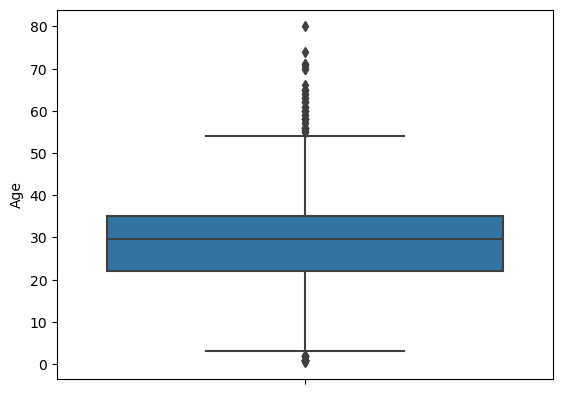

In [22]:
sns.boxplot(data=data, y='Age')
plt.show()

In [23]:
z_scores = zscore(data['Age'])
data = data[(z_scores < 3)]

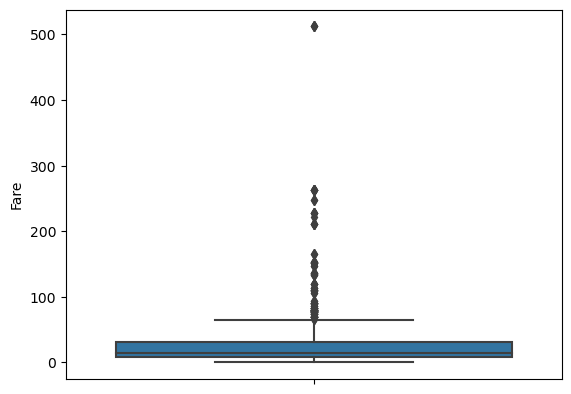

In [24]:
sns.boxplot(data=data, y='Fare')
plt.show()

In [25]:
z_scores = zscore(data['Fare'])
data = data[(z_scores < 3)]

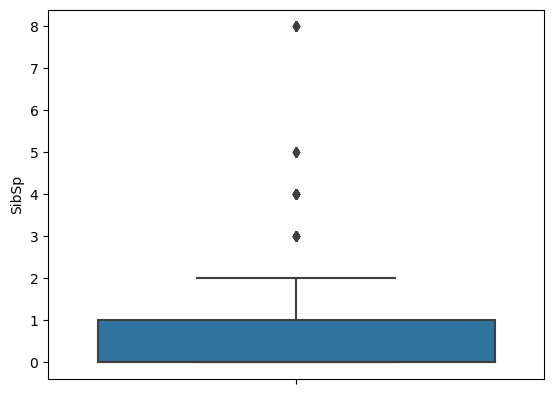

In [26]:
sns.boxplot(data=data, y='SibSp')
plt.show()

In [27]:
z_scores = zscore(data['SibSp'])
data = data[(z_scores < 3)]

# Step 6: Perform min-max scaling on the feature set, excluding 'Name', 'Sex', 'Embarked', 'Ticket', and 'Cabin' columns

In [29]:
X = data.drop(['Survived', 'Name', 'Sex', 'Embarked', 'Ticket'], axis=1)
y = data['Survived']


In [30]:
# Encode categorical columns into numerical values
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Embarked'] = encoder.fit_transform(data['Embarked'])

In [32]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_scaled

array([[1.        , 0.32906374, 0.33333333, 0.        , 0.04397492],
       [0.        , 0.57304056, 0.33333333, 0.        , 0.4323693 ],
       [1.        , 0.39005794, 0.        , 0.        , 0.04806914],
       ...,
       [1.        , 0.44646413, 0.33333333, 0.33333333, 0.14223612],
       [0.        , 0.39005794, 0.        , 0.        , 0.18196519],
       [1.        , 0.48154925, 0.        , 0.        , 0.04700767]])